# Regression between sea level height and the nearest wind stress data point for observational data

This regression can either be performed using observational or model (cmip6) data.
When observational or cmip6 data is used, functions containing respectively 'obs' or 'cmip6' should be used.


For each sea level datapoint, a wind stress data point located nearest to the sea level point is used to perform a regression.

In this notebook, functions are used from: 

'/code/import_data.py' 

'/code/regression.py' 

'/code/figures.py' 

In [247]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('/Users/iriskeizer/Projects/ClimatePhysics/Thesis/Github/Thesis-KNMI/Wind_contribution/Analysis/code')

import import_data as imprt
import regression as regres
import figures as figs

model = 'NearestPoint'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### Import and plot tide gauge data

In [248]:
# Open data file
tg_data = imprt.import_obs_slh_data()

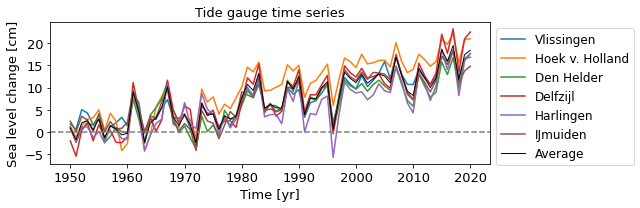

In [249]:
figs.plot_tg_data(tg_data)

#### Import and plot nearby wind data

In [250]:
wind_data_era5 = imprt.import_obs_wind_data(model = model, data_type = 'era5')

In [251]:
wind_data_era5

,Vlissingen,Hoek v. Holland,Den Helder,Delfzijl,Harlingen,IJmuiden,Average,Vlissingen,Hoek v. Holland,Den Helder,Delfzijl,Harlingen,IJmuiden,Average
,u$^2$,u$^2$,u$^2$,u$^2$,u$^2$,u$^2$,u$^2$,v$^2$,v$^2$,v$^2$,v$^2$,v$^2$,v$^2$,v$^2$
time,,,,,,,,,,,,,,
1950,4.733644,6.345675,9.164554,4.467730,9.251664,7.574831,6.923017,2.731458,3.180596,3.728501,2.347318,3.640278,3.380980,3.168188
1951,2.215220,3.094227,5.129766,2.236026,5.331681,3.909268,3.652698,4.189133,4.875644,6.217201,3.186954,5.968407,5.261225,4.949761
1952,3.140214,4.201388,7.262647,4.415530,7.962423,5.366155,5.391393,0.754191,0.748247,0.540864,0.772860,0.559152,0.670609,0.674321
1953,2.692977,3.829823,6.808114,3.867173,7.285601,4.985612,4.911550,1.657496,1.953852,2.634877,1.436066,2.553662,2.212620,2.074762
1954,8.065403,10.580028,14.525902,6.000999,13.994984,12.414601,10.930320,1.852473,2.051144,2.859851,2.762965,3.115296,2.352618,2.499058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,2.870005,3.364094,4.651558,2.790537,5.027586,3.813334,3.752852,1.896073,2.166514,2.891788,1.916594,2.882900,2.388465,2.357056
2017,5.444768,7.589746,12.106847,6.519753,12.284145,9.524419,8.911613,1.284091,1.384115,1.738423,1.690117,1.738774,1.481535,1.552842


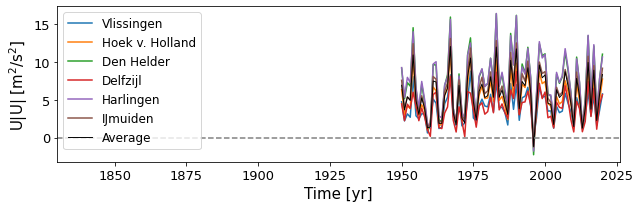

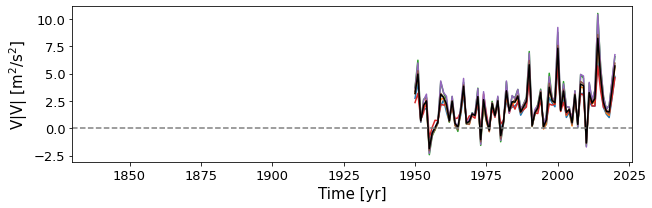

In [252]:
figs.plot_obs_wind_data(wind_data_era5, model, data_type = 'era5', title = False)

In [253]:
wind_data_era5.columns

MultiIndex([(     'Vlissingen', 'u$^2$'),
            ('Hoek v. Holland', 'u$^2$'),
            (     'Den Helder', 'u$^2$'),
            (       'Delfzijl', 'u$^2$'),
            (      'Harlingen', 'u$^2$'),
            (       'IJmuiden', 'u$^2$'),
            (        'Average', 'u$^2$'),
            (     'Vlissingen', 'v$^2$'),
            ('Hoek v. Holland', 'v$^2$'),
            (     'Den Helder', 'v$^2$'),
            (       'Delfzijl', 'v$^2$'),
            (      'Harlingen', 'v$^2$'),
            (       'IJmuiden', 'v$^2$'),
            (        'Average', 'v$^2$')],
           )

In [254]:
import matplotlib.pyplot as plt

def plot_obs_wind_data(data, model, data_type, title = True, period = 'fullperiod'):
    """
    Function to make lineplots of the observed zonal and meridional wind data for each station 
    
    """
    fsize = 13
    fig = plt.figure(figsize=(9,3))
    
    plt.plot(data.index, data['Average', 'u$^2$'], label = 'Zonal')
    plt.plot(data.index, data['Average', 'v$^2$'], label = 'Meridional')
    
    if title == True:
        plt.title(f'ERA5', fontsize = fsize)
        
    plt.axhline(color='grey', linestyle='--')
    
    if data_type == 'era5':
        plt.legend(fontsize = 12)
    
    plt.xlabel('Time [yr]', fontsize = 15)
    plt.ylabel('Wind forcing [m$^2$/s$^2$]', fontsize = 15)
    plt.xticks(fontsize = 13)
    plt.yticks(fontsize = 13)
    plt.xlim(1835, 2021)
    plt.tight_layout()
    
    plt.savefig(f'/Users/iriskeizer/Projects/ClimatePhysics/Thesis/Figures/Wind contribution/{period}/observations/{model}/{data_type}/u2_v2_average.png', bbox_inches = 'tight', dpi = 500)
    

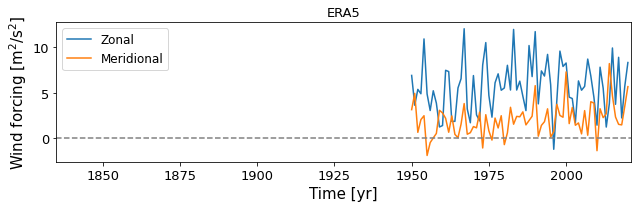

In [255]:
plot_obs_wind_data(wind_data_era5, model, data_type = 'era5', title = True)

#### Plot data locations

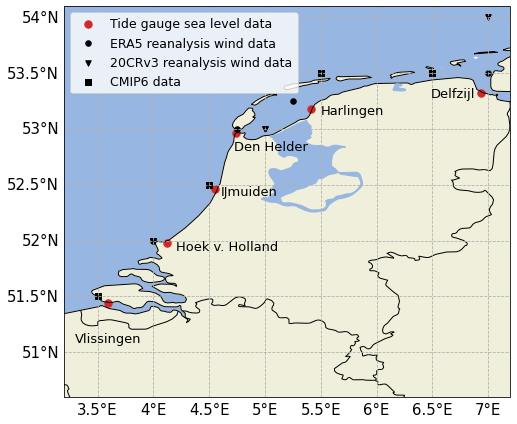

In [256]:
figs.plot_np_locations(title = False)

### Perform regression

In [257]:
results_era5, timeseries_era5, significance_era5, r2_df = regres.regression_obs(wind_data_era5, 
                                                                                tg_data, 
                                                                                wind_model = model, 
                                                                                data_type = 'era5')

In [258]:
r2_df

,R$^2$,R$^2_{wind}$,R$^2_{u^2}$,R$^2_{v^2}$,R$^2_{tr}$,R$^2_{adj}$,"R$^2_{adj, wind}$","R$^2_{adj, u^2}$","R$^2_{adj, v^2}$","R$^2_{adj, tr}$"
station,,,,,,,,,,
Vlissingen,0.775638,0.07273,0.094883,0.090925,0.706408,0.765592,0.03121,0.054355,0.05022,0.693262
Hoek v. Holland,0.893355,0.092681,0.143101,0.076198,0.7783,0.88858,0.052055,0.104732,0.034834,0.768373
Den Helder,0.811394,0.250261,0.26959,0.091908,0.60773,0.802949,0.216691,0.236885,0.051247,0.590166
Delfzijl,0.843619,0.234143,0.246485,0.109377,0.66757,0.836617,0.199851,0.212746,0.069499,0.652685
Harlingen,0.798268,0.334976,0.341578,0.098592,0.522727,0.789235,0.305199,0.312096,0.05823,0.501357
IJmuiden,0.766658,0.156741,0.173378,0.100078,0.635258,0.756209,0.118983,0.136365,0.059783,0.618926
Average,0.862323,0.194813,0.221495,0.100764,0.69565,0.856158,0.15876,0.186636,0.0605,0.682022


In [259]:
results_era5

,R$^2$,R$^2_{wind}$,R$^2_{u^2}$,R$^2_{v^2}$,RMSE,constant,u$^2$,v$^2$,trend
station,,,,,,,,,
Vlissingen,0.775638,0.072730,0.094883,0.090925,2.421130,7.348812,1.388541,-0.215580,4.285542
Hoek v. Holland,0.893355,0.092681,0.143101,0.076198,2.177621,9.960944,2.347732,-0.720891,5.971357
Den Helder,0.811394,0.250261,0.269590,0.091908,2.245620,6.357774,2.372538,-0.204809,3.881352
Delfzijl,0.843619,0.234143,0.246485,0.109377,2.648517,7.614678,2.862171,-0.171725,5.245614
Harlingen,0.798268,0.334976,0.341578,0.098592,2.457107,5.832838,2.895829,-0.081332,3.734588
IJmuiden,0.766658,0.156741,0.173378,0.100078,2.511510,7.142322,1.922333,-0.169479,4.064086
Average,0.862323,0.194813,0.221495,0.100764,2.059856,7.376228,2.323648,-0.291208,4.539246


In [260]:
timeseries_era5

Vlissingen                                          Hoek v. Holland  \
          u$^2$     v$^2$     trend     total wind total           u$^2$   
time                                                                       
1950   0.578919 -0.151827 -7.318957 -6.891864   0.427092        1.076738   
1951  -1.244648 -0.368040 -7.109843 -8.722532  -1.612688       -1.877205   
1952  -0.574869  0.141455 -6.900730 -7.334144  -0.433414       -0.871348   
1953  -0.898709  0.007470 -6.691617 -7.582856  -0.891238       -1.208915   
1954   2.991415 -0.021450 -6.482504 -3.512540   2.969965        4.923651   
...         ...       ...       ...       ...        ...             ...   
2016  -0.770525 -0.027917  6.482504  5.684063  -0.798442       -1.632031   
2017   1.093838  0.062857  6.691617  7.848312   1.156694        2.206978   
2018  -1.688507  0.108358  6.900730  5.320582  -1.580149       -2.779849   
2019  -0.240228 -0.162056  7.109843  6.707559  -0.402284       -0.285895   
2020   1.333985 -0.449783  7.318957  8.203158   0.884201        2.342889   

                                                 ...  IJmuiden            \
         v$^2$      trend      total wind total  ...     u$^2$     v$^2$   
time                                             ...                       
1950 -0.518181 -10.198034  -9.639477   0.558557  ...  0.890523 -0.113304   
1951 -1.208659  -9.906662 -12.992526  -3.085864  ... -1.374021 -0.276640   
1952  0.472636  -9.615289 -10.014002  -0.398712  ... -0.473972  0.122145   
1953 -0.018467  -9.323917 -10.551299  -1.227382  ... -0.709067 -0.011809   
1954 -0.058099  -9.032545  -4.166992   4.865552  ...  3.880480 -0.023971   
...        ...        ...        ...        ...  ...       ...       ...   
2016 -0.105095   9.032545   7.295419  -1.737125  ... -1.433288 -0.027085   
2017  0.213615   9.323917  11.744510   2.420593  ...  2.094957  0.051700   
2018  0.303269   9.615289   7.138709  -2.476580  ... -2.220106  0.063690   
2019 -0.568773   9.906662   9.051994  -0.854668  ... -0.048230 -0.141082   
2020 -1.496064  10.198034  11.044859   0.846825  ...  1.872279 -0.336313   

                                      Average                                \
         trend     total wind total     u$^2$     v$^2$     trend     total   
time                                                                          
1950 -6.940748 -6.163529   0.777219  1.011487 -0.177434 -7.752239 -6.918185   
1951 -6.742441 -8.393102  -1.650661 -1.634808 -0.462024 -7.530746 -9.627578   
1952 -6.544134 -6.895961  -0.351828 -0.227881  0.220938 -7.309253 -7.316197   
1953 -6.345827 -7.066703  -0.720876 -0.616163 -0.002770 -7.087761 -7.706694   
1954 -6.147520 -2.291010   3.856509  4.254140 -0.070547 -6.866268 -2.682676   
...        ...       ...        ...       ...       ...       ...       ...   
2016  6.147520  4.687147  -1.460373 -1.553765 -0.047863  6.866268  5.264640   
2017  6.345827  8.492484   2.146657  2.620631  0.080602  7.087761  9.788994   
2018  6.544134  4.387717  -2.156416 -2.764159  0.089933  7.309253  4.635028   
2019  6.742441  6.553128  -0.189312  0.060437 -0.240218  7.530746  7.350965   
2020  6.940748  8.476714   1.535966  2.157285 -0.580705  7.752239  9.328819   

                 
     wind total  
time             
1950   0.834053  
1951  -2.096832  
1952  -0.006943  
1953  -0.618933  
1954   4.183593  
...         ...  
2016  -1.601628  
2017   2.701233  
2018  -2.674226  
2019  -0.179781  
2020   1.576581  

[71 rows x 35 columns]

In [261]:
timeseries_era5.max()

Vlissingen       u$^2$          3.515097
                 v$^2$          0.486323
                 trend          7.318957
                 total          8.203158
                 wind total     3.478582
Hoek v. Holland  u$^2$          5.510589
                 v$^2$          1.590154
                 trend         10.198034
                 total         11.744510
                 wind total     5.191808
Den Helder       u$^2$          5.407029
                 v$^2$          0.429649
                 trend          6.628670
                 total          9.037095
                 wind total     5.482071
Delfzijl         u$^2$          6.712037
                 v$^2$          0.370121
                 trend          8.958591
                 total         12.351609
                 wind total     6.653536
Harlingen        u$^2$          6.754738
                 v$^2$          0.169512
                 trend          6.378023
                 total          9.928120
                

In [262]:
timeseries_era5.std()

Vlissingen       u$^2$         1.398424
                 v$^2$         0.217114
                 trend         4.316045
                 total         4.533700
                 wind total    1.354510
Hoek v. Holland  u$^2$         2.364442
                 v$^2$         0.726022
                 trend         6.013859
                 total         6.347534
                 wind total    2.279708
Den Helder       u$^2$         2.389424
                 v$^2$         0.206267
                 trend         3.908978
                 total         4.690886
                 wind total    2.354981
Delfzijl         u$^2$         2.882543
                 v$^2$         0.172947
                 trend         5.282950
                 total         6.195333
                 wind total    2.839331
Harlingen        u$^2$         2.916440
                 v$^2$         0.081911
                 trend         3.761169
                 total         4.922563
                 wind total    2.900602


In [263]:
significance_era5

,Vlissingen,Hoek v. Holland,Den Helder,Delfzijl,Harlingen,IJmuiden,Average
reggression_contributor,,,,,,,
u$^2$,True,True,True,True,True,True,True
v$^2$,True,True,True,True,True,True,True
trend,True,True,True,True,True,True,True
total,True,True,True,True,True,True,True
wind total,True,True,True,True,True,True,True


#### Plot regression results

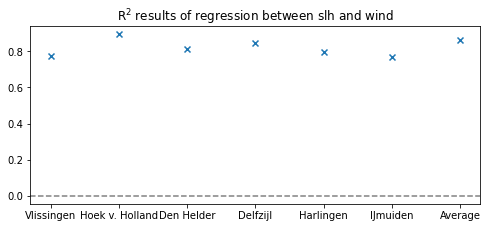

In [264]:
figs.plot_obs_result_per_station(results_era5, 'R$^2$', model, 'era5')

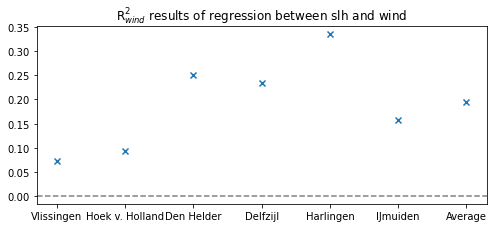

In [265]:
figs.plot_obs_result_per_station(results_era5, 'R$^2_{wind}$', model, 'era5')

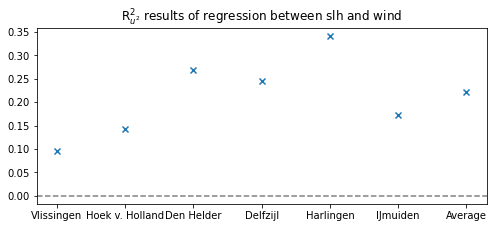

In [266]:
figs.plot_obs_result_per_station(results_era5,'R$^2_{u^2}$', model, 'era5')

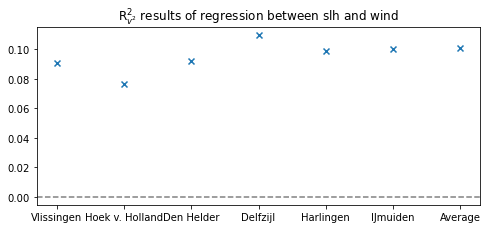

In [267]:
figs.plot_obs_result_per_station(results_era5, 'R$^2_{v^2}$', model, 'era5')

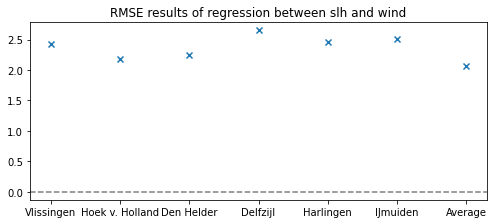

In [268]:
figs.plot_obs_result_per_station(results_era5, 'RMSE', model, 'era5')

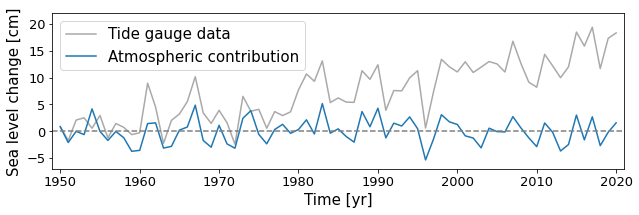

In [269]:
figs.plot_obs_timeseries_one_station_tg_ac(tg_data, timeseries_era5, 'Average', model, 'era5', title = False)

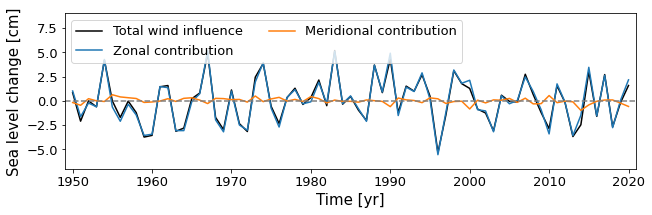

In [270]:
figs.plot_obs_timeseries_one_station_ac_u_v(tg_data, timeseries_era5, 'Average', model, 'era5', title = False)

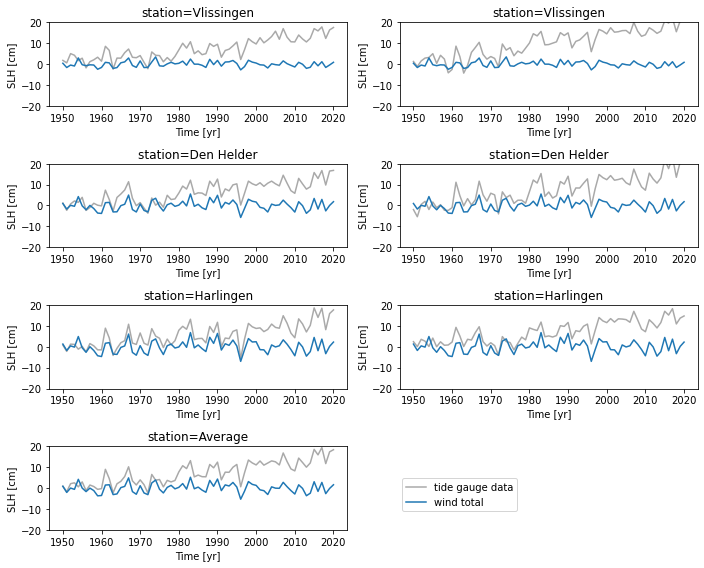

In [271]:
figs.plot_obs_timeseries_per_station(tg_data, timeseries_era5, ['wind total'], model, 'era5')

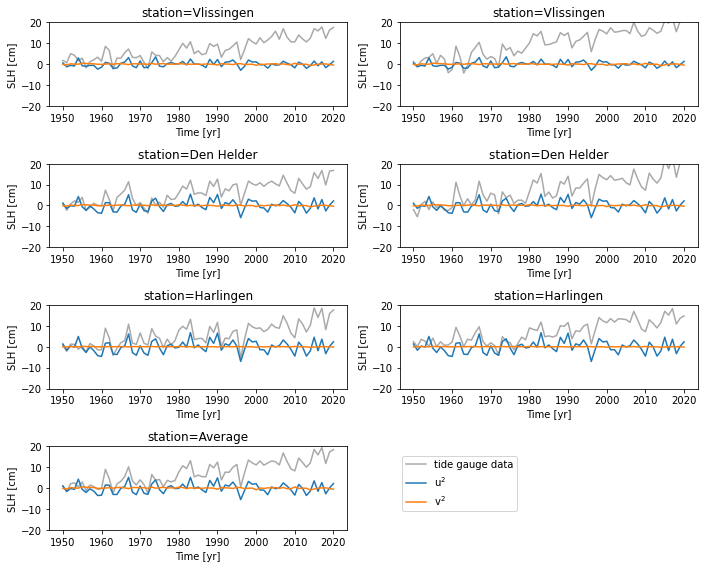

In [272]:
figs.plot_obs_timeseries_per_station(tg_data, timeseries_era5, ['u$^2$', 'v$^2$'], model, 'era5')

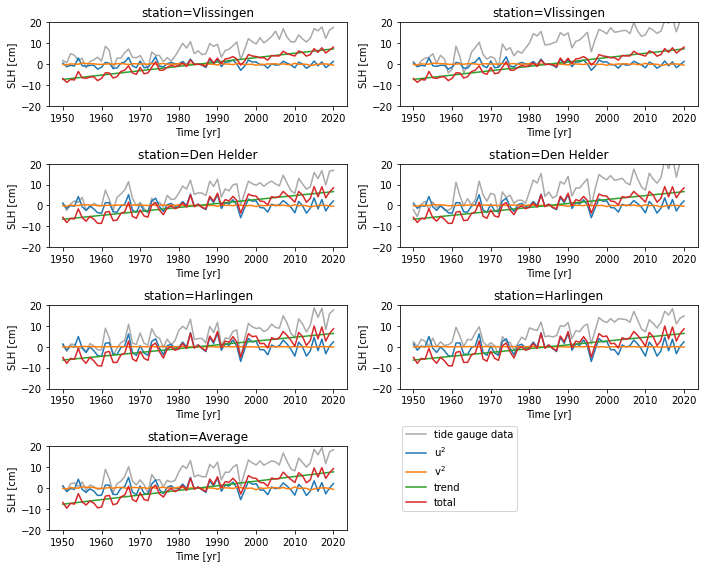

In [273]:
figs.plot_obs_timeseries_per_station(tg_data, timeseries_era5, ['u$^2$', 'v$^2$', 'trend', 'total'], model, 'era5')

#### Plot trends

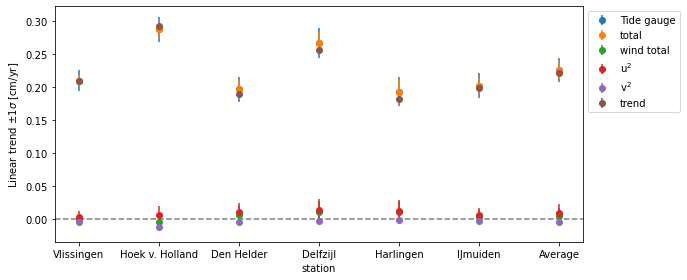

In [274]:
figs.plot_obs_trends_timeseries_per_station(tg_data, timeseries_era5, ['total', 'wind total', 'u$^2$', 'v$^2$', 'trend'], model, 'era5')

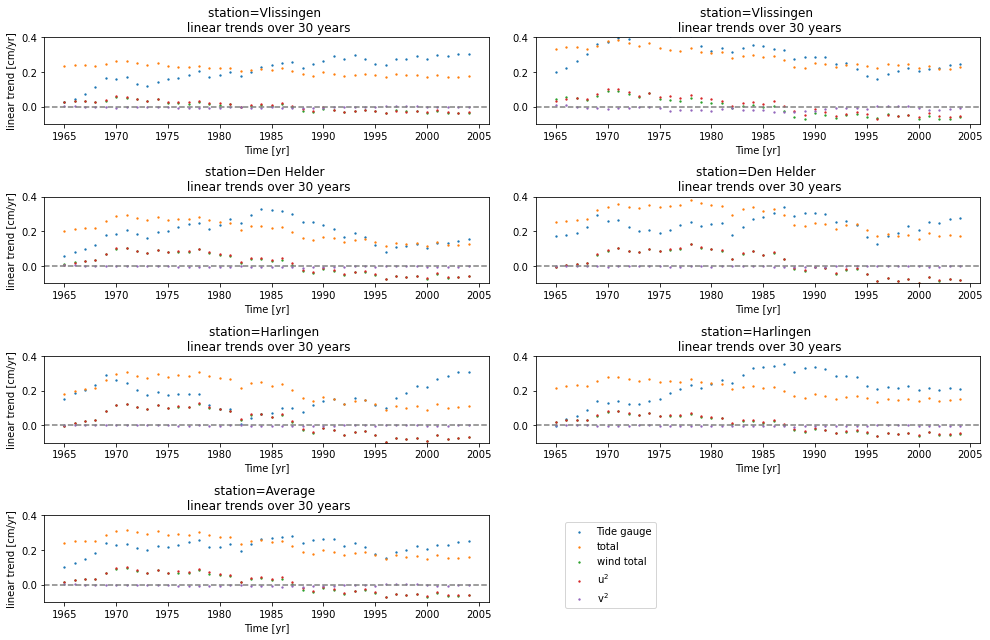

In [275]:
figs.plot_obs_decadal_trends_timeseries_per_station(tg_data, timeseries_era5, ['total', 'wind total', 'u$^2$', 'v$^2$'], 30, model, 'era5', errorbar = False)

## 20cr observational data

#### Import and plot tide gauge data

In [276]:
# Open data file
tg_data = imprt.import_obs_slh_data(data_type = '20cr')

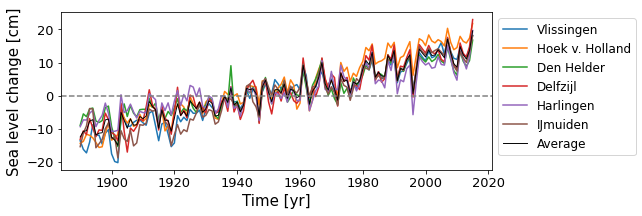

In [277]:
import matplotlib.pyplot as plt
figs.plot_tg_data(tg_data, title = False)
plt.xlabel('Time [yr]', fontsize = 15)
plt.ylabel('Sea level change [cm]', fontsize = 15)
plt.savefig('/Users/iriskeizer/Projects/ClimatePhysics/Thesis/Figures/Wind contribution/fullperiod/observations/tide_gauge_full_period')


#### Import and plot nearby wind data

In [278]:
wind_data_20cr = imprt.import_obs_wind_data(model = model, data_type = '20cr')

In [279]:
wind_data_20cr

,Vlissingen,Hoek v. Holland,Den Helder,Delfzijl,Harlingen,IJmuiden,Average,Vlissingen,Hoek v. Holland,Den Helder,Delfzijl,Harlingen,IJmuiden,Average
,u$^2$,u$^2$,u$^2$,u$^2$,u$^2$,u$^2$,u$^2$,v$^2$,v$^2$,v$^2$,v$^2$,v$^2$,v$^2$,v$^2$
time,,,,,,,,,,,,,,
1836,6.584667,6.584667,6.910478,5.909475,6.910478,6.584667,6.580739,1.016261,1.016261,0.396981,0.334031,0.396981,1.016261,0.696129
1837,2.056189,2.056189,2.076946,1.594069,2.076946,2.056189,1.986088,1.440843,1.440843,1.660021,1.529385,1.660021,1.440843,1.528659
1838,-0.019153,-0.019153,-0.999386,-1.026900,-0.999386,-0.019153,-0.513855,-0.146213,-0.146213,-0.360937,-0.073212,-0.360937,-0.146213,-0.205621
1839,2.099380,2.099380,1.256711,0.144364,1.256711,2.099380,1.492654,1.163936,1.163936,1.244915,1.302951,1.244915,1.163936,1.214098
1840,5.090846,5.090846,6.790268,7.502552,6.790268,5.090846,6.059271,0.042540,0.042540,-0.715971,-0.831080,-0.715971,0.042540,-0.355900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011,7.801598,7.801598,10.394631,10.312186,10.394631,7.801598,9.084373,3.458502,3.458502,3.940963,4.279425,3.940963,3.458502,3.756143
2012,6.454442,6.454442,8.370232,8.622816,8.370232,6.454442,7.454434,3.146500,3.146500,2.973744,2.873735,2.973744,3.146500,3.043454


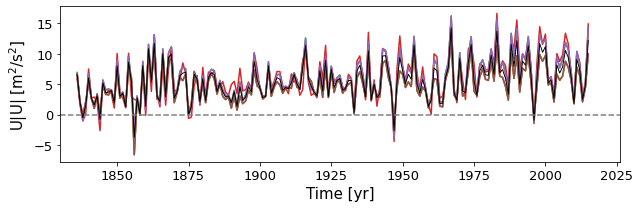

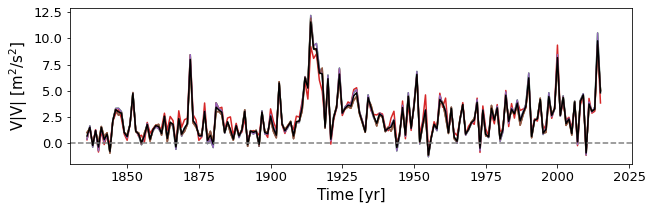

In [280]:
figs.plot_obs_wind_data(wind_data_20cr, model=model, data_type = '20cr', title = False)

In [281]:
def plot_obs_wind_data(data, model, data_type, title = True, period = 'fullperiod'):
    """
    Function to make lineplots of the observed zonal and meridional wind data for each station 
    
    """
    fsize = 13
    fig = plt.figure(figsize=(9,3))
    
    plt.plot(data.index, data['Average', 'u$^2$'], label = 'Zonal')
    plt.plot(data.index, data['Average', 'v$^2$'], label = 'Meridional')
    
    if title == True:
        plt.title(f'20CRv3', fontsize = fsize)
        
    plt.axhline(color='grey', linestyle='--')
    
    if data_type == 'era5':
        plt.legend(fontsize = 12)
    
    plt.xlabel('Time [yr]', fontsize = 15)
    plt.ylabel('Wind forcing [m$^2$/s$^2$]', fontsize = 15)
    plt.xticks(fontsize = 13)
    plt.yticks(fontsize = 13)
    plt.xlim(1835, 2021)
    plt.tight_layout()
    
    plt.savefig(f'/Users/iriskeizer/Projects/ClimatePhysics/Thesis/Figures/Wind contribution/{period}/observations/{model}/{data_type}/u2_v2_average.png', bbox_inches = 'tight', dpi = 500)
    

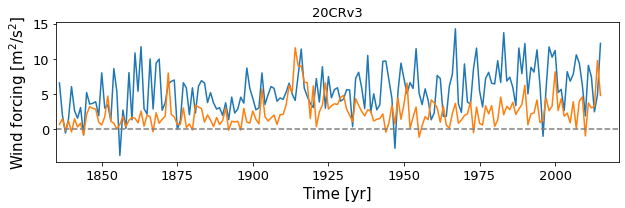

In [282]:
plot_obs_wind_data(wind_data_20cr, model, '20cr', title = True)

#### Plot data locations

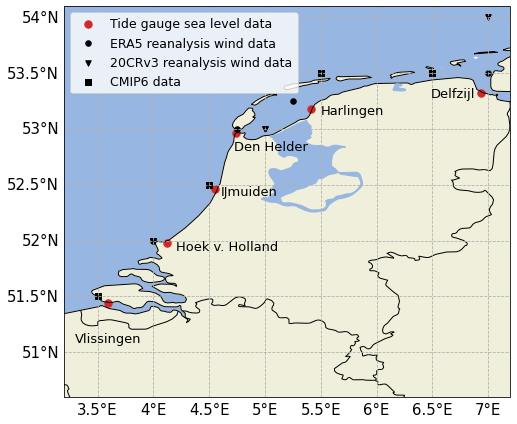

In [283]:
figs.plot_np_locations(title = False)

### Perform regression

In [284]:
results_20cr, timeseries_20cr, significance_20cr, r2_df = regres.regression_obs(wind_data_20cr, tg_data, wind_model = model, data_type = '20cr')

In [285]:
r2_df

,R$^2$,R$^2_{wind}$,R$^2_{u^2}$,R$^2_{v^2}$,R$^2_{tr}$,R$^2_{adj}$,"R$^2_{adj, wind}$","R$^2_{adj, u^2}$","R$^2_{adj, v^2}$","R$^2_{adj, tr}$"
station,,,,,,,,,,
Vlissingen,0.909907,0.167629,0.15704,0.0,0.889893,0.907692,0.147161,0.136312,-0.02459,0.887185
Hoek v. Holland,0.931613,0.20037,0.194841,0.002488,0.901032,0.929932,0.180707,0.175042,-0.022041,0.898598
Den Helder,0.860689,0.354057,0.35076,0.00155,0.769269,0.857263,0.338173,0.334795,-0.023002,0.763595
Delfzijl,0.892861,0.348587,0.347637,0.006145,0.799986,0.890226,0.332569,0.331596,-0.018294,0.795068
Harlingen,0.842974,0.435231,0.436653,0.0117,0.688735,0.839113,0.421344,0.4228,-0.012603,0.681081
IJmuiden,0.880525,0.188852,0.184181,0.00259,0.851716,0.877587,0.168906,0.16412,-0.021937,0.84807
Average,0.928553,0.29075,0.288148,0.003121,0.869567,0.926796,0.273309,0.270643,-0.021392,0.866359


In [286]:
results_20cr

,R$^2$,R$^2_{wind}$,R$^2_{u^2}$,R$^2_{v^2}$,RMSE,constant,u$^2$,v$^2$,trend
station,,,,,,,,,
Vlissingen,0.909907,0.167629,0.157040,1.095948e-07,2.647606,-5.663606,1.442938,-0.520298,11.346121
Hoek v. Holland,0.931613,0.200370,0.194841,2.488180e-03,2.500945,-4.055133,1.927236,-0.207581,12.229507
Den Helder,0.860689,0.354057,0.350760,1.550318e-03,2.484439,-2.731276,2.233327,-0.199408,7.243911
Delfzijl,0.892861,0.348587,0.347637,6.145040e-03,2.736412,-4.266657,2.745335,0.195941,9.367838
Harlingen,0.842974,0.435231,0.436653,1.169982e-02,2.479065,-2.192713,2.661063,0.148255,6.097163
IJmuiden,0.880525,0.188852,0.184181,2.589863e-03,3.045302,-5.698098,1.718796,-0.164290,10.955796
Average,0.928553,0.290750,0.288148,3.120975e-03,2.103832,-4.094299,2.131394,-0.134289,9.522055


In [287]:
timeseries_20cr

Vlissingen                                            Hoek v. Holland  \
          u$^2$     v$^2$      trend      total wind total           u$^2$   
time                                                                         
1836   0.865183  0.346252 -19.543181 -18.331746   1.211435        1.155567   
1837  -1.465018  0.236987 -19.324821 -20.552853  -1.228031       -1.956727   
1838  -2.532918  0.645413 -19.106462 -20.993967  -1.887505       -3.383050   
1839  -1.442794  0.308248 -18.888102 -20.022647  -1.134545       -1.927043   
1840   0.096513  0.596838 -18.669743 -17.976391   0.693351        0.128906   
...         ...       ...        ...        ...        ...             ...   
2011   1.491374 -0.282255  18.669743  19.878862   1.209119        1.991929   
2012   0.798173 -0.201962  18.888102  19.484314   0.596212        1.066067   
2013  -1.442734 -0.213804  19.106462  17.449924  -1.656537       -1.926963   
2014  -0.219319 -1.819612  19.324821  17.285890  -2.038931       -0.292930   
2015   2.617590 -0.689418  19.543181  21.471353   1.928172        3.496140   

                                                 ...  IJmuiden            \
         v$^2$      trend      total wind total  ...     u$^2$     v$^2$   
time                                             ...                       
1836  0.138142 -21.064775 -19.771065   1.293709  ...  1.030587  0.109333   
1837  0.094549 -20.829414 -22.691592  -1.862178  ... -1.745097  0.074831   
1838  0.257497 -20.594054 -23.719607  -3.125553  ... -3.017157  0.203797   
1839  0.122980 -20.358693 -22.162756  -1.804063  ... -1.718624  0.097333   
1840  0.238117 -20.123332 -19.756309   0.367024  ...  0.114964  0.188459   
...        ...        ...        ...        ...  ...       ...       ...   
2011 -0.112610  20.123332  22.002651   1.879319  ...  1.776492 -0.089125   
2012 -0.080576  20.358693  21.344184   0.985491  ...  0.950767 -0.063772   
2013 -0.085300  20.594054  18.581790  -2.012263  ... -1.718552 -0.067511   
2014 -0.725961  20.829414  19.810523  -1.018891  ... -0.261248 -0.574564   
2015 -0.275054  21.064775  24.285861   3.221087  ...  3.118015 -0.217692   

                                        Average                       \
          trend      total wind total     u$^2$     v$^2$      trend   
time                                                                   
1836 -18.870864 -17.730944   1.139920  0.738428  0.111788 -16.401309   
1837 -18.660017 -20.330283  -1.670266 -2.361302  0.057432 -16.218055   
1838 -18.449169 -21.262529  -2.813360 -4.047861  0.170664 -16.034800   
1839 -18.238321 -19.859612  -1.621291 -2.694192  0.077969 -15.851545   
1840 -18.027474 -17.724051   0.303423  0.386626  0.180476 -15.668290   
...         ...        ...        ...       ...       ...        ...   
2011  18.027474  19.714840   1.687367  2.427478 -0.088002  15.668290   
2012  18.238321  19.125316   0.886995  1.327857 -0.041470  15.851545   
2013  18.449169  16.663105  -1.786064 -2.015365 -0.055482  16.034800   
2014  18.660017  17.824204  -0.835812 -0.431655 -0.480730  16.218055   
2015  18.870864  21.771188   2.900323  4.529432 -0.157157  16.401309   

                            
          total wind total  
time                        
1836 -15.551094   0.850216  
1837 -18.521925  -2.303871  
1838 -19.911997  -3.877197  
1839 -18.467767  -2.616222  
1840 -15.101189   0.567101  
...         ...        ...  
2011  18.007765   2.339475  
2012  17.137931   1.286387  
2013  13.963952  -2.070848  
2014  15.305669  -0.912385  
2015  20.773584   4.372275  

[180 rows x 35 columns]

In [288]:
timeseries_20cr.max()

Vlissingen       u$^2$          3.882332
                 v$^2$          0.903243
                 trend         19.543181
                 total         21.471353
                 wind total     3.538177
Hoek v. Holland  u$^2$          5.185372
                 v$^2$          0.360362
                 trend         21.064775
                 total         24.285861
                 wind total     5.048066
Den Helder       u$^2$          6.277814
                 v$^2$          0.335566
                 trend         12.477309
                 total         17.251733
                 wind total     6.171607
Delfzijl         u$^2$          7.726975
                 v$^2$          0.689632
                 trend         16.135678
                 total         22.728949
                 wind total     7.636880
Harlingen        u$^2$          7.480165
                 v$^2$          0.654646
                 trend         10.502089
                 total         16.632563
                

In [289]:
timeseries_20cr.std()

Vlissingen       u$^2$          1.446963
                 v$^2$          0.521749
                 trend         11.377770
                 total         11.761655
                 wind total     1.382024
Hoek v. Holland  u$^2$          1.932612
                 v$^2$          0.208160
                 trend         12.263621
                 total         12.917818
                 wind total     1.880256
Den Helder       u$^2$          2.239557
                 v$^2$          0.199965
                 trend          7.264117
                 total          8.338789
                 wind total     2.202314
Delfzijl         u$^2$          2.752993
                 v$^2$          0.196488
                 trend          9.393969
                 total         10.917948
                 wind total     2.795111
Harlingen        u$^2$          2.668486
                 v$^2$          0.148668
                 trend          6.114171
                 total          7.604178
                

In [290]:
significance_20cr

,Vlissingen,Hoek v. Holland,Den Helder,Delfzijl,Harlingen,IJmuiden,Average
reggression_contributor,,,,,,,
u$^2$,True,True,True,True,True,True,True
v$^2$,False,False,False,False,False,False,False
trend,True,True,True,True,True,True,True
total,True,True,True,True,True,True,True
wind total,True,True,True,True,True,True,True


#### Plot regression results

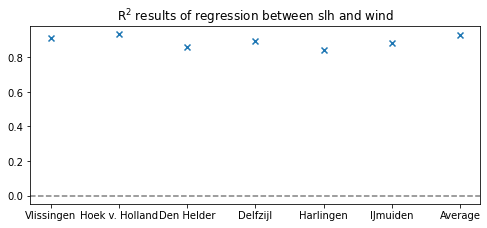

In [291]:
figs.plot_obs_result_per_station(results_20cr, 'R$^2$', model, '20cr')

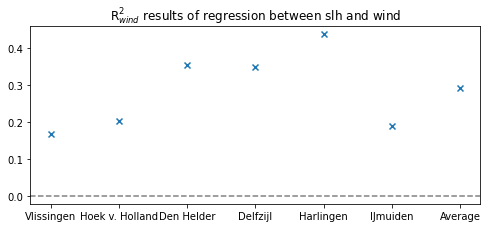

In [292]:
figs.plot_obs_result_per_station(results_20cr, 'R$^2_{wind}$', model, '20cr')

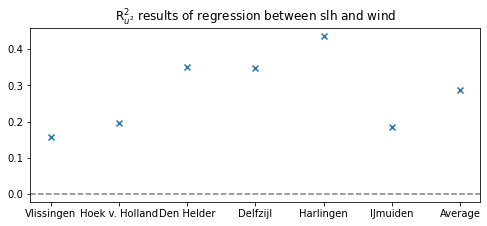

In [293]:
figs.plot_obs_result_per_station(results_20cr,'R$^2_{u^2}$', model, '20cr')

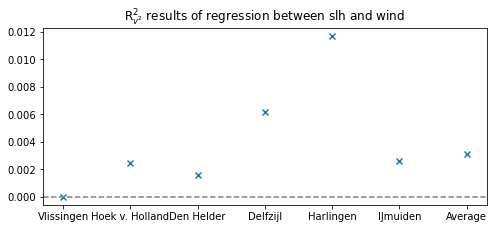

In [294]:
figs.plot_obs_result_per_station(results_20cr, 'R$^2_{v^2}$', model, '20cr')

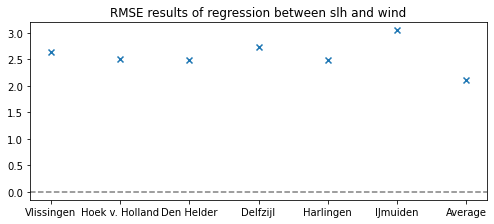

In [295]:
figs.plot_obs_result_per_station(results_20cr, 'RMSE', model, '20cr')

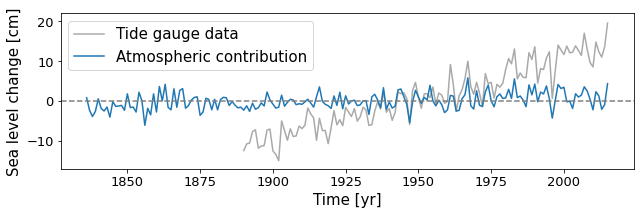

In [296]:
figs.plot_obs_timeseries_one_station_tg_ac(tg_data, timeseries_20cr, 'Average', model, '20cr', title = False)

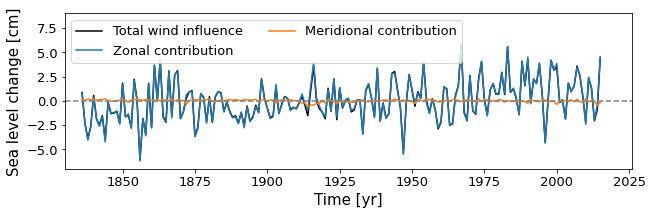

In [297]:
figs.plot_obs_timeseries_one_station_ac_u_v(tg_data, timeseries_20cr, 'Average', model, '20cr', title = False)

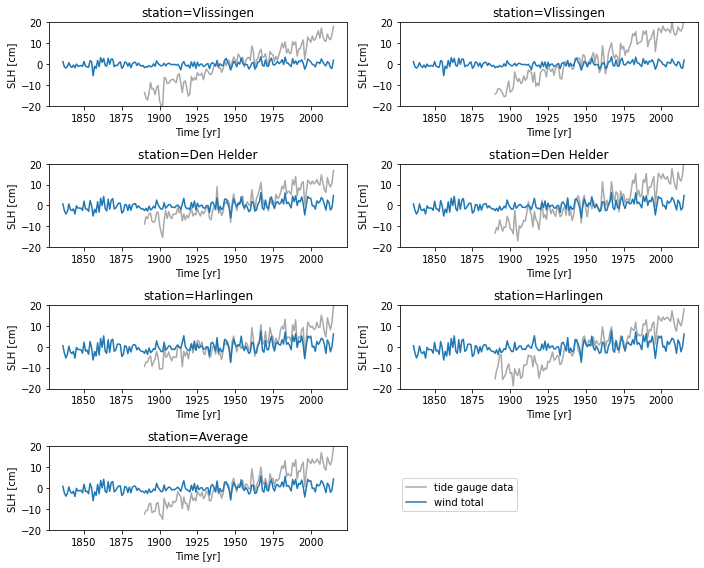

In [298]:
figs.plot_obs_timeseries_per_station(tg_data, timeseries_20cr, ['wind total'], model, '20cr')

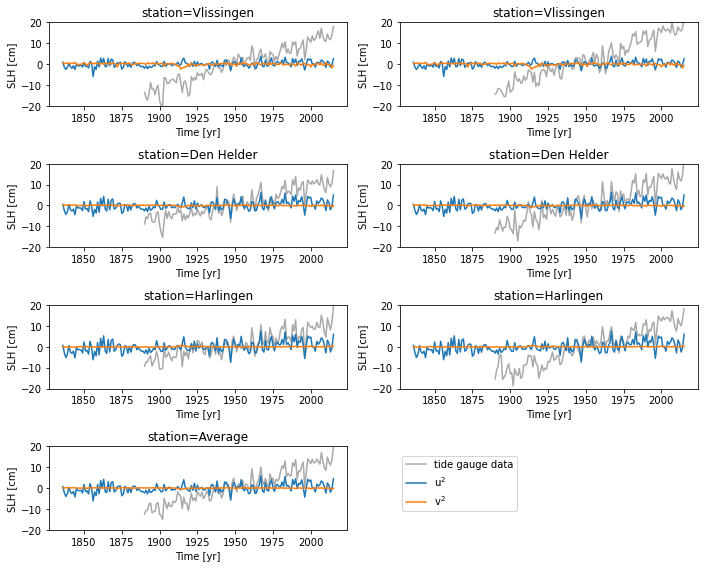

In [299]:
figs.plot_obs_timeseries_per_station(tg_data, timeseries_20cr, ['u$^2$', 'v$^2$'], model, '20cr')

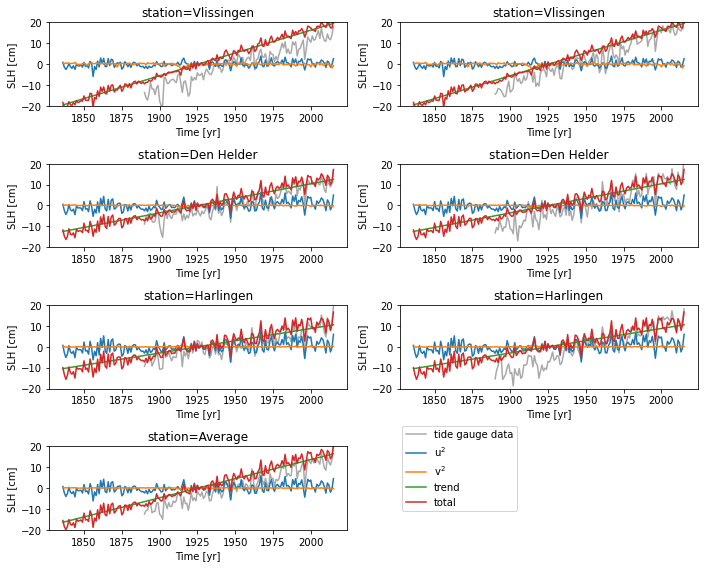

In [300]:
figs.plot_obs_timeseries_per_station(tg_data, timeseries_20cr, ['u$^2$', 'v$^2$', 'trend', 'total'], model, '20cr')

#### Plot trends

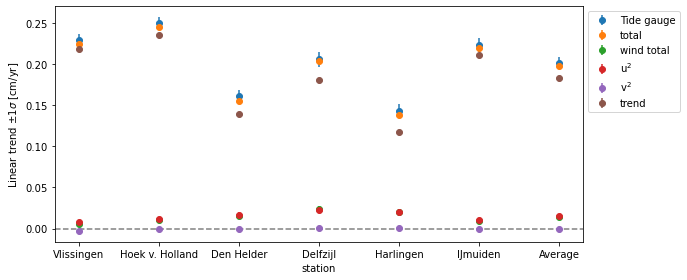

In [301]:
figs.plot_obs_trends_timeseries_per_station(tg_data, timeseries_20cr, ['total', 'wind total', 'u$^2$', 'v$^2$', 'trend'], model, '20cr')

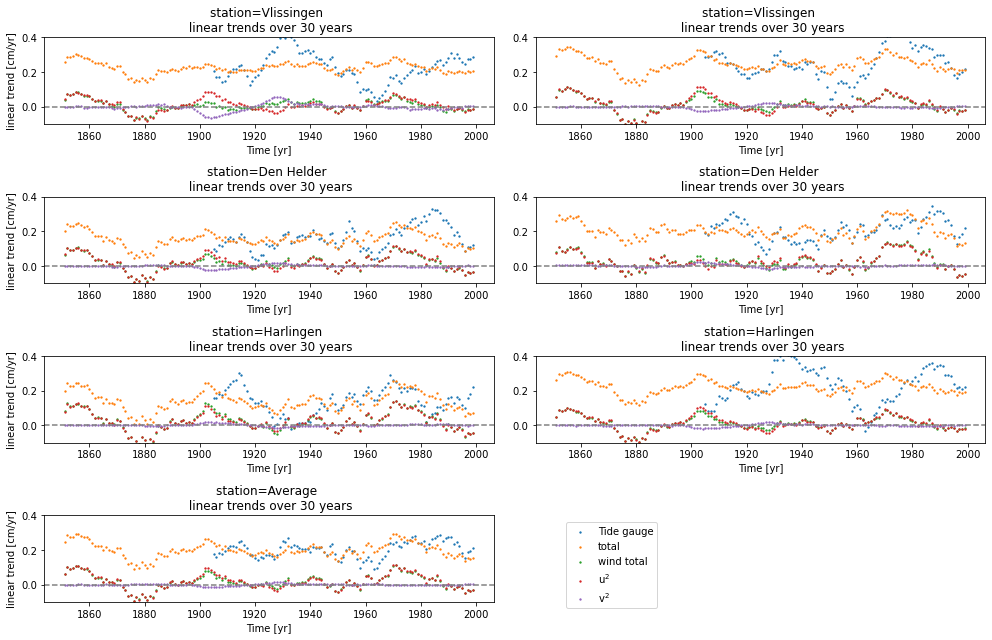

In [302]:
figs.plot_obs_decadal_trends_timeseries_per_station(tg_data, timeseries_20cr, ['total', 'wind total', 'u$^2$', 'v$^2$'], 30, model, '20cr', errorbar = False)

#### Calculate trends

In [303]:
from scipy.stats import linregress
import pandas as pd
import numpy as np

periods = ['1950-2015', '1950-2020', '1836-2015', '1890-2015']
df = pd.DataFrame({'period':periods, 'trend': [np.nan, np.nan, np.nan, np.nan], 'se': [np.nan, np.nan, np.nan, np.nan]})
df = df.set_index('period')

df = pd.concat([df, df, df], keys = ['ERA5', '20CRv3', 'tg_data'], axis=1)

# ERA5 trends
df['ERA5', 'trend']['1950-2015'] = linregress(timeseries_era5.loc[1950:2015].index, timeseries_era5['Average', 'wind total'].loc[1950:2015].values).slope*10
df['ERA5', 'trend']['1950-2020'] = linregress(timeseries_era5.index, timeseries_era5['Average', 'wind total'].values).slope*10

# ERA5 standard errors
df['ERA5', 'se']['1950-2015'] = linregress(timeseries_era5.loc[1950:2015].index, timeseries_era5['Average', 'wind total'].loc[1950:2015].values).stderr*10
df['ERA5', 'se']['1950-2020'] = linregress(timeseries_era5.index, timeseries_era5['Average', 'wind total'].values).stderr*10

# 20CRv3 trends
df['20CRv3', 'trend']['1950-2015'] = linregress(timeseries_20cr.loc[1950:2015].index, timeseries_20cr['Average', 'wind total'].loc[1950:2015].values).slope*10
df['20CRv3', 'trend']['1836-2015'] = linregress(timeseries_20cr.index, timeseries_20cr['Average', 'wind total'].values).slope*10
df['20CRv3', 'trend']['1890-2015'] = linregress(timeseries_20cr.loc[1890:2015].index, timeseries_20cr['Average', 'wind total'].loc[1890:2015].values).slope*10


# 20CRv3 standard errors
df['20CRv3', 'se']['1950-2015'] = linregress(timeseries_20cr.loc[1950:2015].index, timeseries_20cr['Average', 'wind total'].loc[1950:2015].values).stderr*10
df['20CRv3', 'se']['1836-2015'] = linregress(timeseries_20cr.index, timeseries_20cr['Average', 'wind total'].values).stderr*10
df['20CRv3', 'se']['1890-2015'] = linregress(timeseries_20cr.loc[1890:2015].index, timeseries_20cr['Average', 'wind total'].loc[1890:2015].values).stderr*10


# Tide gauge trends
df['tg_data', 'trend']['1950-2015'] = linregress(tg_data.loc[1950:2015].index, tg_data['Average'].loc[1950:2015].values).slope*10
df['tg_data', 'trend']['1890-2015'] = linregress(tg_data.loc[1890:2015].index, tg_data['Average'].loc[1890:2015].values).slope*10
df['tg_data', 'trend']['1950-2020'] = linregress(tg_data.loc[1950:2020].index, tg_data['Average'].loc[1950:2020].values).slope*10

# Tide gauge standard errors
df['tg_data', 'se']['1950-2015'] = linregress(tg_data.loc[1950:2015].index, tg_data['Average'].loc[1950:2015].values).stderr*10
df['tg_data', 'se']['1890-2015'] = linregress(tg_data.loc[1890:2015].index, tg_data['Average'].loc[1890:2015].values).stderr*10
df['tg_data', 'se']['1950-2020'] = linregress(tg_data.loc[1950:2020].index, tg_data['Average'].loc[1950:2020].values).stderr*10



df



ERA5              20CRv3             tg_data          
              trend        se     trend        se     trend        se
period                                                               
1950-2015  0.056444  0.150016  0.194130  0.139752  2.244302  0.199460
1950-2020  0.044387  0.133134       NaN       NaN  2.244302  0.199460
1836-2015       NaN       NaN  0.143631  0.028321       NaN       NaN
1890-2015       NaN       NaN  0.185369  0.047197  2.017917  0.070184

In [304]:
trend_1890_2020 = linregress(tg_data.loc[1890:2020].index, tg_data['Average'].loc[1890:2020].values).slope*10
trend_1901_2020 = linregress(tg_data.loc[1901:2020].index, tg_data['Average'].loc[1901:2020].values).slope*10

In [305]:
trend_1890_2020

2.017917231869853

In [306]:
trend_1901_2020

2.0440731041739153

In [307]:
tg_data['Average']

time
1890   -12.439436
1891   -10.763791
1892   -10.540761
1893    -7.656861
1894    -7.214575
          ...    
2011    14.813151
2012    12.359168
2013    11.039388
2014    13.614029
2015    19.566069
Name: Average, Length: 126, dtype: float64